In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
import plotnine as p9

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
# Code Here
penguins = load_penguins().dropna()
penguins

# i would dummy species, island, sex

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

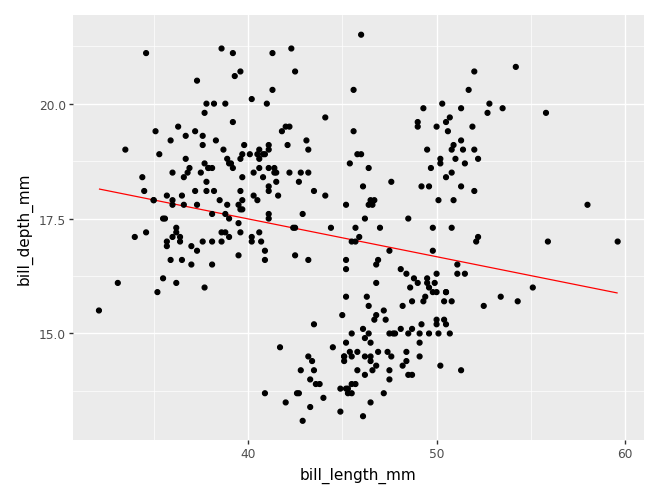

In [19]:
# Simple Linear Regression Model

X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"] 

lr = LinearRegression().fit(X,y)
lr

penguins["Pred_degree_1"] = lr.predict(X)

(p9.ggplot(penguins, p9.aes(
    x = "bill_length_mm", 
    y = "bill_depth_mm"
)) 
+p9.geom_line(penguins, p9.aes("bill_length_mm", "Pred_degree_1"), color = "red")
+p9.geom_point()
)

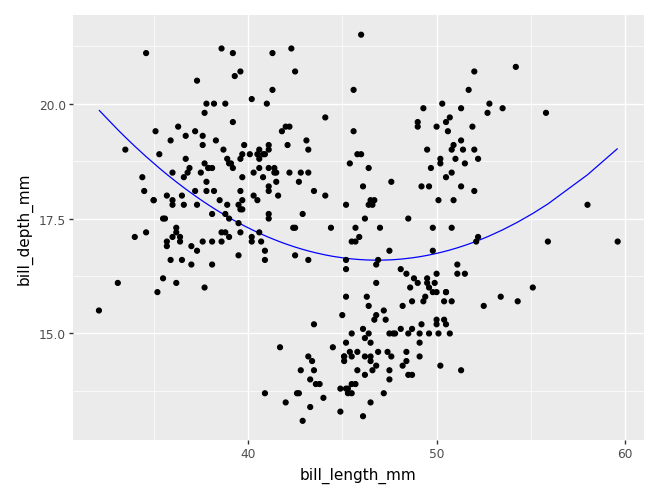

In [18]:
#Quadratic model

coef = np.polyfit(penguins["bill_length_mm"], penguins["bill_depth_mm"],2)

quad_model = np.poly1d(coef)

penguins["pred_degree_2"] = quad_model(penguins["bill_length_mm"])

(p9.ggplot(penguins, p9.aes(
    x = "bill_length_mm", 
    y = "bill_depth_mm"
)) 
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_2"), color = "blue")
+p9.geom_point()
)

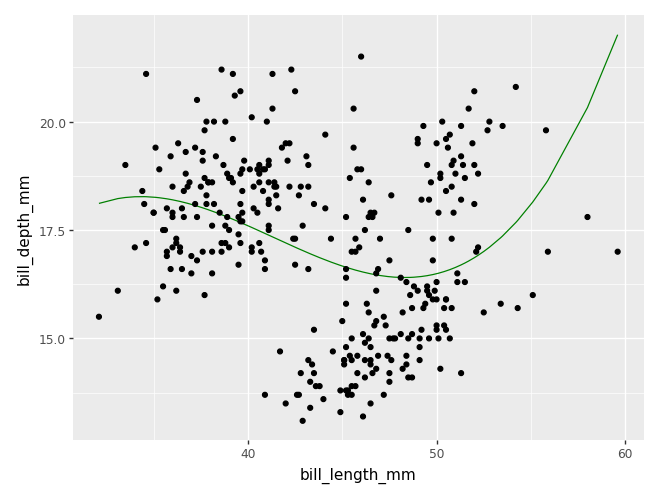

In [23]:
#cubic model

cube_coef = np.polyfit(penguins["bill_length_mm"], penguins["bill_depth_mm"], 3)

cubic_model = np.poly1d(cube_coef)

penguins["pred_degree_3"] = cubic_model(penguins["bill_length_mm"])

(p9.ggplot(penguins, p9.aes(
    x = "bill_length_mm", 
    y = "bill_depth_mm"
)) 
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_3"), color = "green")
+p9.geom_point()
)

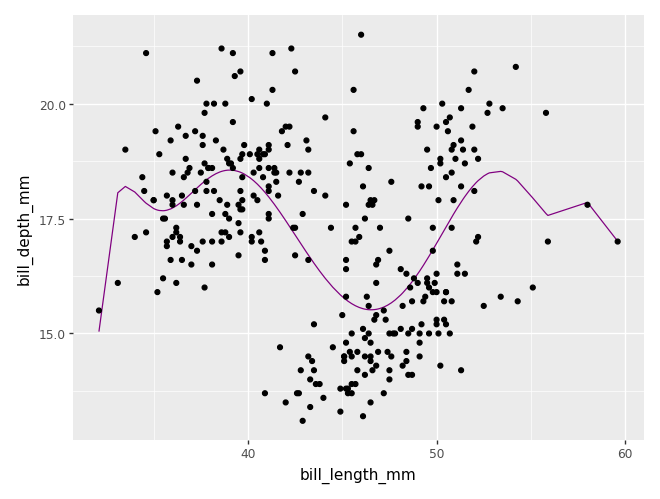

In [24]:
#10th degree model

ten_coef = np.polyfit(penguins["bill_length_mm"], penguins["bill_depth_mm"], 10)

ten_model = np.poly1d(ten_coef)

penguins["pred_degree_10"] = ten_model(penguins["bill_length_mm"])

(p9.ggplot(penguins, p9.aes(
    x = "bill_length_mm", 
    y = "bill_depth_mm"
)) 
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_10"), color = "purple")
+p9.geom_point()
)

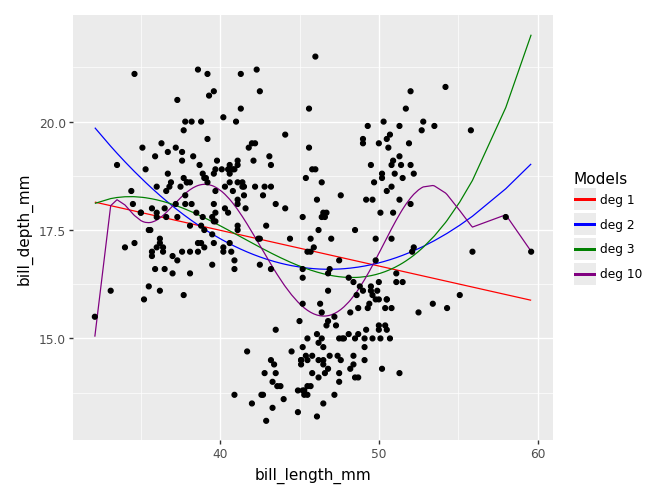

In [33]:
#all models combined 

(p9.ggplot(penguins, p9.aes(
    x = "bill_length_mm", 
    y = "bill_depth_mm"
)) 
+p9.geom_line(penguins, p9.aes("bill_length_mm", "Pred_degree_1",  color='"deg 1"'))
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_2", color='"deg 2"'))
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_3", color='"deg 3"'))
+p9.geom_line(penguins, p9.aes("bill_length_mm", "pred_degree_10", color='"deg 10"'))
+p9.scale_color_manual(values={"deg 1":"red","deg 2":"blue","deg 3":"green","deg 10":"purple"},
                            name="Models")

+p9.geom_point()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

* Model 1 is under fiiting the data as it doesn't do a particularly good job at representing all of the data 
specifically the middle section of the data where there is a dip 
* Model 10 is over fitting the data as there are several points that are almost too close to the lines and 
misrepresent the overall story of the data and create larger standard errors
* Model 3 best represents this data as we can see that is tells the story of the 3 different clusters of points 
and most likely contains the least amout of standard errors compared to the rest of the models predictions